# Acquaring libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data set with name called "winemag-data_first150k"

In [2]:
data1=pd.read_csv('winemag-data_first150k.csv')

# Heads of the data sets 

In [3]:
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Shape of the data 

In [4]:
data1.shape

(150930, 11)

As we see the data has around 150930 Observations & 11 variables/columns

In [5]:
## Null values 

In [6]:
data1.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

##Droping null values

In [7]:
data1.dropna(inplace=True)

In [8]:
data1.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

# creating a variable called "location" where we gonna merge ("country","region_1","province")

In [9]:
data1['location'] = data1['country']+","+data1['region_1']+","+data1['province']

# So renaming the variable called "points to ratings"

In [10]:
data1.rename(columns={'points':'ratings'},inplace=True)

In [11]:
data1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'ratings',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'location'],
      dtype='object')

##checking the value counts in the column "variety"

In [12]:
data1['ratings'].value_counts()

87     4917
90     4362
88     4141
86     3305
92     3269
89     2969
91     2968
85     2681
84     2550
93     2278
83     1462
94     1434
82     1211
95      704
81      326
96      267
80      214
97      124
98       38
99       13
100       8
Name: ratings, dtype: int64

So if we look at this counts of ratings column ratings fall from 80-100 , so taught of classify above and below 90 for better  understanding

In [13]:
data1['rating'] = np.where(data1['ratings']>=90,'one','two')

 ##so here we go with null values as their is a thumb rule that we have 20% of nan values in the data we can drop them so droping the 'designation & region_2anf droping other columns also "country","region_1","province","Unnamed: 0"
 ,"ratings"

In [15]:
Wine1 = data1.drop(["country","region_1","province","Unnamed: 0","designation","region_2","ratings"],axis = 1)

In [16]:
Wine1.head()

,description,price,variety,winery,location,rating
0,This tremendous 100% varietal wine hails from ...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",one
2,Mac Watson honors the memory of a wine once ma...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",one
3,"This spent 20 months in 30% new French oak, an...",65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",one
8,This re-named vineyard was formerly bottled as...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",one
9,The producer sources from two blocks of the vi...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",one


In [17]:
Wine1.replace({'one':1,
              'two':2},inplace=True)

In [18]:
Wine1.columns

Index(['description', 'price', 'variety', 'winery', 'location', 'rating'], dtype='object')

In [19]:
Wine1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  39241 non-null  object 
 1   price        39241 non-null  float64
 2   variety      39241 non-null  object 
 3   winery       39241 non-null  object 
 4   location     39241 non-null  object 
 5   rating       39241 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ MB


# Importing Data set "winemag-data-130k-v2.csv"

In [20]:
data2=pd.read_csv('winemag-data-130k-v2.csv')

In [21]:
data2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [22]:
data2.shape

(129971, 14)

In [23]:
data2.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [24]:
data2.dropna(inplace=True)

In [25]:
data2.isnull().sum()

Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [26]:
data2['location'] = data2['country']+","+data2['region_1']+","+data2['province']

In [27]:
data2.rename(columns={'points':'ratings'},inplace=True)

In [34]:
data2['rating'] = np.where(data2['ratings']>=90,'one','two')

In [29]:
Wine2 = data2.drop(["country","region_1","province","Unnamed: 0","designation","region_2","taster_name","taster_twitter_handle","title","ratings"],axis = 1)

In [35]:
Wine2.replace({'one':1,
              'two':2},inplace=True)

In [36]:
Wine2.shape

(22387, 6)

In [37]:
Wine1.shape

(39241, 6)

In [38]:
Wine1.head()

,description,price,variety,winery,location,rating
0,This tremendous 100% varietal wine hails from ...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",1
2,Mac Watson honors the memory of a wine once ma...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",1
3,"This spent 20 months in 30% new French oak, an...",65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",1
8,This re-named vineyard was formerly bottled as...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",1
9,The producer sources from two blocks of the vi...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",1


In [39]:
Wine2.head()

,description,price,variety,winery,location,rating
4,"Much like the regular bottling from 2012, this...",65.0,Pinot Noir,Sweet Cheeks,"US,Willamette Valley,Oregon",2
10,"Soft, supple plum envelopes an oaky structure ...",19.0,Cabernet Sauvignon,Kirkland Signature,"US,Napa Valley,California",2
23,This wine from the Geneseo district offers aro...,22.0,Merlot,Bianchi,"US,Paso Robles,California",2
25,Oak and earth intermingle around robust aromas...,69.0,Pinot Noir,Castello di Amorosa,"US,Sonoma Coast,California",2
35,As with many of the Erath 2010 vineyard design...,50.0,Pinot Noir,Erath,"US,McMinnville,Oregon",2


In [40]:
rawdata=pd.concat([Wine1,Wine2])

In [42]:
rawdata.head(50)

,description,price,variety,winery,location,rating
0,This tremendous 100% varietal wine hails from ...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",1
2,Mac Watson honors the memory of a wine once ma...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",1
3,"This spent 20 months in 30% new French oak, an...",65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",1
8,This re-named vineyard was formerly bottled as...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",1
9,The producer sources from two blocks of the vi...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",1
11,"From 18-year-old vines, this supple well-balan...",48.0,Pinot Noir,Patricia Green Cellars,"US,Ribbon Ridge,Oregon",1
12,A standout even in this terrific lineup of 201...,48.0,Pinot Noir,Patricia Green Cellars,"US,Dundee Hills,Oregon",1
14,"With its sophisticated mix of mineral, acid an...",185.0,Pinot Noir,Domaine Serene,"US,Dundee Hills,Oregon",1
15,"First made in 2006, this succulent luscious Ch...",90.0,Chardonnay,Bergström,"US,Willamette Valley,Oregon",1
16,"This blockbuster, powerhouse of a wine suggest...",325.0,Cabernet Sauvignon,Hall,"US,Diamond Mountain District,California",1


In [43]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61628 entries, 0 to 129950
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  61628 non-null  object 
 1   price        61628 non-null  float64
 2   variety      61628 non-null  object 
 3   winery       61628 non-null  object 
 4   location     61628 non-null  object 
 5   rating       61628 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB


In [44]:
rawdata.columns

Index(['description', 'price', 'variety', 'winery', 'location', 'rating'], dtype='object')

In [46]:
rawdata['variety'].value_counts()

Pinot Noir            12230
Chardonnay             7299
Cabernet Sauvignon     7261
Red Blend              4737
Syrah                  4469
                      ...  
Tempranillo-Malbec        1
Rosado                    1
Mourvèdre-Syrah           1
Falanghina                1
Tinta Madeira             1
Name: variety, Length: 214, dtype: int64

###Unquie Values in variables 

In [47]:
rawdata.nunique()

description    39864
price            158
variety          214
winery          4149
location         218
rating             2
dtype: int64

In [48]:
rawdata['winery'].value_counts()

Williams Selyem          375
Columbia Crest           369
Testarossa               365
Chateau Ste. Michelle    291
Kendall-Jackson          256
                        ... 
Domenico                   1
Megandina Cellars          1
JFJ                        1
Lucca                      1
Once and It's Gone         1
Name: winery, Length: 4149, dtype: int64

# Cleaning Data 

In [49]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df = rawdata.copy()
stop_words = stopwords.words("english")

In [52]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [53]:
df['description'] = df["description"].apply(lambda x: clean(x))

In [54]:
df['description'] = df["description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [58]:
df['description'][3]

'spent months new french oak incorporates fruit ponzi aurora abetina madrona vineyards among others aromatic dense toasty deftly blends aromas flavors toast cigar box blackberry black cherry coffee graphite tannins polished fine sheen frame finish loaded dark chocolate espresso drink'

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61628 entries, 0 to 129950
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   description         61628 non-null  object 
 1   price               61628 non-null  float64
 2   variety             61628 non-null  object 
 3   winery              61628 non-null  object 
 4   location            61628 non-null  object 
 5   rating              61628 non-null  int64  
 6   description_Token   61628 non-null  object 
 7   description_Lemm    61628 non-null  object 
 8   Sentiment_TextBlob  61628 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ MB


Stemming : (verb (used with object))

In [59]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

In [72]:
ps = PorterStemmer()
df['description'] = df['description'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))
df['description']

0         tremend variet wine hail oakvil age three year...
2         mac watson honor memori wine made mother treme...
3         spent month new french oak incorpor fruit ponz...
8         name vineyard formerli bottl delancellotti fin...
9         produc sourc two block vineyard wine one high ...
                                ...                        
129919    ripe rich almost decad thick wine close washin...
129926    pure syrah rein estat vineyard focu also tight...
129945    hail one popular vineyard variet whole central...
129949    bone use oak wine spent nine month enjoy cradl...
129950    open herbac dollop thyme fresh dug earth evolv...
Name: description, Length: 61628, dtype: object

#Wordcloud

In [73]:
!pip install WordCloud
from wordcloud import WordCloud


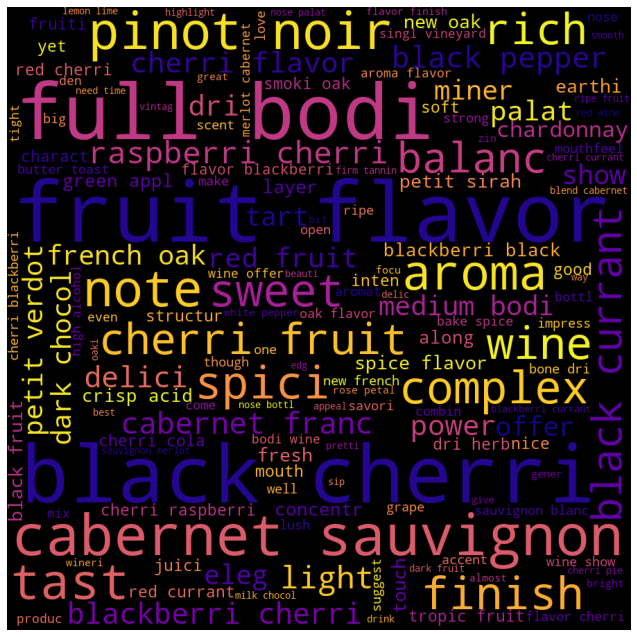

In [74]:
reviews = pd.Series(df['description'].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [75]:
!pip install textblob
import textblob            
from textblob import TextBlob

Tokenization
Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [76]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [77]:
df['description'] = df['description'].apply(str)

In [78]:
tokenizer = RegexpTokenizer(r'\w+')
df["description_Token"] = df["description"].apply(lambda x: tokenizer.tokenize(x))

LEMMATIZATION
Lemmatization extracts the root of the word. For example, from the word "driving', "drive" is extracted. Unlike stemming, lemmatization understands the context and provides the root words rather than simply removing the suffix or prefix of the word.

In [79]:
lemm = WordNetLemmatizer()

In [80]:
def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [81]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\santu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [82]:
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [96]:
df["description_Lemm"] = df["description_Token"].apply(lambda x: lemm_text(x))

In [97]:
df[["description_Lemm","description_Token"]].sample(30)

,description_Lemm,description_Token
19654,"[young, tart, somewhat, candi, thea, bring, mo...","[young, tart, somewhat, candi, thea, bring, mo..."
133121,"[rich, bottl, oppenland, wineri, relea, also, ...","[richest, bottl, oppenland, wineri, relea, als..."
120650,"[funki, note, old, leather, permeat, pinot, no...","[funki, note, old, leather, permeat, pinot, no..."
16035,"[revel, revelri, mainstay, blend, mix, roughli...","[revel, revelri, mainstay, blend, mix, roughli..."
1200,"[firm, focu, lightli, spice, effort, support, ...","[firm, focu, lightli, spice, effort, support, ..."
76787,"[light, aroma, appl, red, fruit, spice, lead, ...","[light, aroma, appl, red, fruit, spice, lead, ..."
77920,"[blend, wineri, variou, vineyard, sourc, russi...","[blend, wineri, variou, vineyard, sourc, russi..."
73702,"[cabernet, inten, berri, concentr, soft, tanni...","[cabernet, inten, berri, concentr, soft, tanni..."
86094,"[delici, drinkabl, one, best, california, gren...","[delici, drinkabl, one, best, california, gren..."
17489,"[big, rich, three, cc, chard, decad, rich, sup...","[biggest, richest, three, cc, chard, decad, ri..."


Most repeated Words

In [95]:
import itertools
import collections

In [94]:
review_list = list(itertools.chain.from_iterable(df['description_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(15), columns=['Words', 'Count'])
word_freq_DF


,Words,Count
0,flavor,40034
1,wine,35280
2,fruit,26604
3,cherri,21503
4,finish,15886
5,acid,15466
6,dri,15356
7,tannin,14252
8,black,12814
9,oak,12521


In [93]:
import seaborn as sns

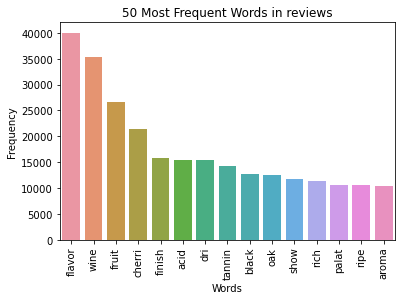

In [107]:
sns.barplot(data = word_freq_DF, x = "Words", y = "Count")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.title("50 Most Frequent Words in reviews")
plt.show()

SENTIMENT ANALYSIS

In [98]:
df["Sentiment_TextBlob"] = df["description"].apply(lambda x: TextBlob(x).sentiment[0])

In [99]:
df[["description", "Sentiment_TextBlob"]].head(10)

,description,Sentiment_TextBlob
0,tremend variet wine hail oakvil age three year...,0.272222
2,mac watson honor memori wine made mother treme...,-0.150000
3,spent month new french oak incorpor fruit ponz...,0.001623
8,name vineyard formerli bottl delancellotti fin...,0.116667
9,produc sourc two block vineyard wine one high ...,0.240000
11,year old vine suppl well balanc effort blend f...,0.025000
12,standout even terrif lineup relea patricia gre...,-0.100000
14,sophist mix miner acid tart fruit seduct effor...,0.320833
15,first made succul lusciou chardonnay miner got...,0.125000
16,blockbust powerh wine suggest blueberri pie ch...,0.118750


In [108]:
!pip install vaderSentiment

In [109]:
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [111]:
senti = SentimentIntensityAnalyzer()
df["Sentiment_VADER"] = df["description"].apply(lambda x: senti.polarity_scores(x)['compound'])

In [112]:
df[["description", "Sentiment_VADER", "Sentiment_TextBlob"]].sample(15)

,description,Sentiment_VADER,Sentiment_TextBlob
121274,ballentin fantast littl known track record zin...,0.4404,0.165333
25952,second vintag cab syrah blend set umami soak f...,0.3400,0.050000
43280,medium pink color appl berri aroma follow spri...,0.4588,0.125000
91858,rich iron carpaccio note nose singl vineyard e...,0.8934,0.094048
18853,vineyard rutherford wine show dusti tannin com...,0.6908,0.033333
40414,feel bit tough gritti stringi tannin give pala...,-0.1280,-0.388889
38379,half cabernet sauvignon half syrah still young...,0.7269,-0.062202
21605,one sip take know terrif pinot noir dri silki ...,0.5574,0.025000
87704,smooth sleek dri sophist rhône style blend mad...,0.0000,0.050000
148067,smell appl pie pear spearmint tast pineappl gr...,0.8020,0.466667


In [114]:
df[["description", "Sentiment_VADER"]][df["Sentiment_VADER"] < -0.1]

,description,Sentiment_VADER
201,fig spice perfum tawni cabernet franc ice wine...,-0.3612
223,wineri proprietari block zin grape plant covet...,-0.4404
317,inten aromat yet big even chunki mouth young w...,-0.1027
319,aroma pop note orang peel ember cure meat blac...,-0.2023
403,nose creativ blend gewürztramin sauvignon blan...,-0.2732
...,...,...
129618,field blend red wine cabernet sauvignon cabern...,-0.3182
129714,come singl block wineri estat vineyard malbec ...,-0.2732
129775,picturesqu crystallin salmon color begin scent...,-0.1531
129912,ranch hou block famou vineyard fleshi lushli l...,-0.1280


C:\Users\santu\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


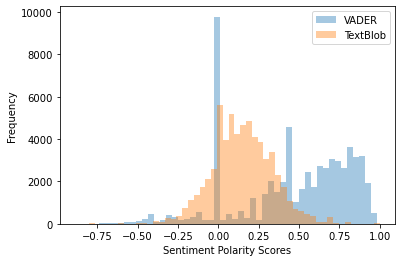

In [115]:
sns.distplot(df["Sentiment_VADER"], kde = False, label = "VADER")
sns.distplot(df["Sentiment_TextBlob"], kde = False, label = "TextBlob")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()

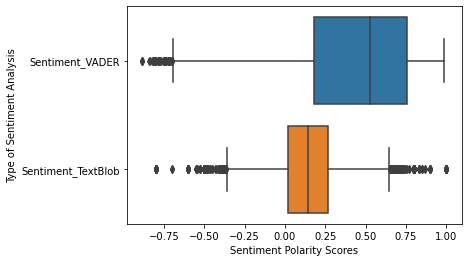

In [116]:
sns.boxplot(data = pd.melt(df[["Sentiment_VADER", "Sentiment_TextBlob"]]), x = "value", y = "variable")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Type of Sentiment Analysis")
plt.show()

MOST POSITIVE DESCRIPTION - TEXTBLOB


In [119]:
DF_Pos_TB = df[["description","description_Lemm","Sentiment_TextBlob"]][df["Sentiment_TextBlob"] ==df["Sentiment_TextBlob"].max()]

In [120]:
DF_Pos_TB

,description,description_Lemm,Sentiment_TextBlob
1193,savori aroma richli fruiti accent butter vanil...,"[savori, aroma, richli, fruiti, accent, butter...",1.0
21786,youth pinot noir brisk appeal array raspberri ...,"[youth, pinot, noir, brisk, appeal, array, ras...",1.0
50015,ultra ripe point overrip dri wine rustic tanni...,"[ultra, ripe, point, overrip, dri, wine, rusti...",1.0
55842,three thing mark pinot consid oak acid fruiti ...,"[three, thing, mark, pinot, consid, oak, acid,...",1.0
57405,show welcom return form disappoint tannin alwa...,"[show, welcom, return, form, disappoint, tanni...",1.0
58915,bottl variabl year signorello best vintag dri ...,"[bottl, variabl, year, signorello, best, vinta...",1.0
61336,mix tart raci fruit flavor blueberri plum pie ...,"[mix, tart, raci, fruit, flavor, blueberri, pl...",1.0
61503,made leaner eleg style empha restraint reserv ...,"[make, leaner, eleg, style, empha, restraint, ...",1.0
63965,delici pack superrich refin viognier flavor pi...,"[delici, pack, superrich, refin, viognier, fla...",1.0
64109,terr roug expen syrah best barrel select fortu...,"[terr, roug, expen, syrah, best, barrel, selec...",1.0


WORDCLOUD OF THE MOST POSTIVIE DESCRIPTION

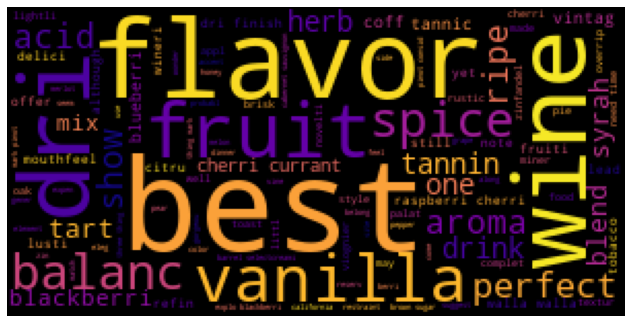

In [121]:
# Word Cloud from the most postive reviews from TextBlob

plt.figure(figsize = (9, 9))
wcloud_Pos_TB = WordCloud(width = 300, height = 150, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Pos_TB["description"].tolist()).astype(str)))
plt.imshow(wcloud_Pos_TB)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

MOST POSTIVE DESCRIPTION- VADER

In [122]:
df[["description","description_Lemm","Sentiment_TextBlob"]][df["Sentiment_TextBlob"] == df["Sentiment_TextBlob"].min()]

,description,description_Lemm,Sentiment_TextBlob
1999,stew tomato graphit mushroom brown sauc lead a...,"[stew, tomato, graphit, mushroom, brown, sauc,...",-0.8
8287,merlot base blend accompani compon cabernet sa...,"[merlot, base, blend, accompani, compon, caber...",-0.8
22644,temecula base produc faze cabernet sauvignon f...,"[temecula, base, produc, faze, cabernet, sauvi...",-0.8
46424,fire barbi bring rib bigtim tannin ripe flavor...,"[fire, barbi, bring, rib, bigtim, tannin, ripe...",-0.8
47202,wine smell like soap tast chemic someth went s...,"[wine, smell, like, soap, tast, chemic, someth...",-0.8
49404,base cabernet franc bordeaux blend delici flav...,"[base, cabernet, franc, bordeaux, blend, delic...",-0.8
54097,betz famili merlot base blend offer sleek plum...,"[betz, famili, merlot, base, blend, offer, sle...",-0.8
61892,syrah cabernet blend base countri wine le baux...,"[syrah, cabernet, blend, base, countri, wine, ...",-0.8
72291,lot ripe jammi blackberri cherri fruit petit v...,"[lot, ripe, jammi, blackberri, cherri, fruit, ...",-0.8
75217,ripe forward blackberri cherri jam sangiov bas...,"[ripe, forward, blackberri, cherri, jam, sangi...",-0.8


In [123]:
DF_Neg_TB =df[["description","description_Lemm","Sentiment_TextBlob"]][df["Sentiment_TextBlob"] < -0.0]

In [124]:
DF_Neg_TB

,description,description_Lemm,Sentiment_TextBlob
2,mac watson honor memori wine made mother treme...,"[mac, watson, honor, memori, wine, make, mothe...",-0.150000
12,standout even terrif lineup relea patricia gre...,"[standout, even, terrif, lineup, relea, patric...",-0.100000
24,san jose base produc adam comartin head feet m...,"[san, jose, base, produc, adam, comartin, head...",-0.288889
28,cranberri bake rhubarb ani crush slate aroma s...,"[cranberri, bake, rhubarb, ani, crush, slate, ...",-0.183333
58,cabernet make half blend aroma black cherri he...,"[cabernet, make, half, blend, aroma, black, ch...",-0.136667
...,...,...,...
129840,entri oaki fruit light seem bit unbalanc fruit...,"[entri, oaki, fruit, light, seem, bit, unbalan...",-0.042857
129867,cabernet sauvignon make major wine rest cabern...,"[cabernet, sauvignon, make, major, wine, rest,...",-0.043750
129882,wine mostli cabernet sauvignon rest equal part...,"[wine, mostli, cabernet, sauvignon, rest, equa...",-0.122222
129898,plum cherri fruit show nose blend cabernet sau...,"[plum, cherri, fruit, show, nose, blend, caber...",-0.083333


MOST NEGATIVE DESCRIPTION - VADER

In [125]:
df[["description","description_Lemm","Sentiment_VADER"]][df["Sentiment_VADER"] == df["Sentiment_VADER"].min()]

,description,description_Lemm,Sentiment_VADER
26174,heavi dull mouth seem pick darkest ripest soft...,"[heavi, dull, mouth, seem, pick, darkest, ripe...",-0.886
51284,heavi dull mouth seem pick darkest ripest soft...,"[heavi, dull, mouth, seem, pick, darkest, ripe...",-0.886
82904,heavi dull mouth seem pick darkest ripest soft...,"[heavi, dull, mouth, seem, pick, darkest, ripe...",-0.886
129224,heavi dull mouth seem pick darkest ripest soft...,"[heavi, dull, mouth, seem, pick, darkest, ripe...",-0.886
14420,one seri singl clone offer kason suffer same f...,"[one, seri, singl, clone, offer, kason, suffer...",-0.886


In [126]:
DF_Neg_VADER = df[["description","description_Lemm","Sentiment_VADER"]][df["Sentiment_VADER"] < -0.1]

In [127]:
DF_Neg_VADER

,description,description_Lemm,Sentiment_VADER
201,fig spice perfum tawni cabernet franc ice wine...,"[fig, spice, perfum, tawni, cabernet, franc, i...",-0.3612
223,wineri proprietari block zin grape plant covet...,"[wineri, proprietari, block, zin, grape, plant...",-0.4404
317,inten aromat yet big even chunki mouth young w...,"[inten, aromat, yet, big, even, chunki, mouth,...",-0.1027
319,aroma pop note orang peel ember cure meat blac...,"[aroma, pop, note, orang, peel, ember, cure, m...",-0.2023
403,nose creativ blend gewürztramin sauvignon blan...,"[nose, creativ, blend, gewürztramin, sauvignon...",-0.2732
...,...,...,...
129618,field blend red wine cabernet sauvignon cabern...,"[field, blend, red, wine, cabernet, sauvignon,...",-0.3182
129714,come singl block wineri estat vineyard malbec ...,"[come, singl, block, wineri, estat, vineyard, ...",-0.2732
129775,picturesqu crystallin salmon color begin scent...,"[picturesqu, crystallin, salmon, color, begin,...",-0.1531
129912,ranch hou block famou vineyard fleshi lushli l...,"[ranch, hou, block, famou, vineyard, fleshi, l...",-0.1280


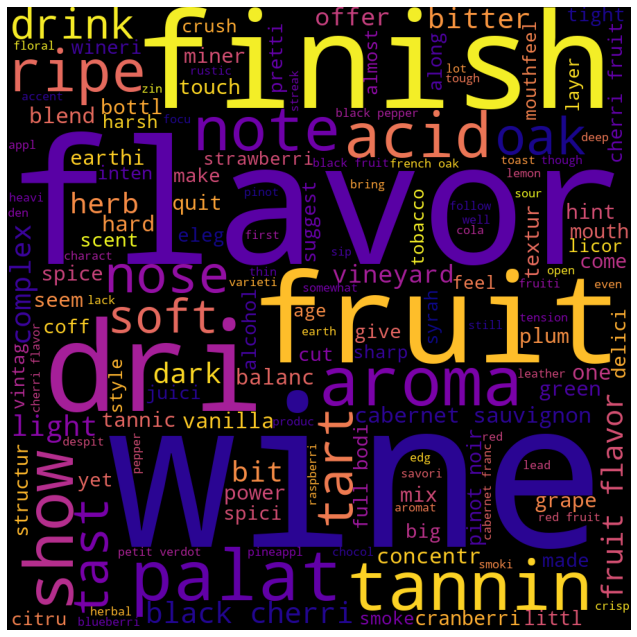

In [128]:
plt.figure(figsize = (9, 9))
wcloud_Neg_VADER = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Neg_VADER["description"].tolist()).astype(str)))
plt.imshow(wcloud_Neg_VADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# BI-GRAMS

In [129]:
from nltk.util import ngrams

In [130]:
df["Bigrams"] = df["description_Lemm"].apply(lambda x: list(ngrams(x, 2)))

In [131]:
df

,description,price,variety,winery,location,rating,description_Token,description_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams
0,tremend variet wine hail oakvil age three year...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",1,"[tremend, variet, wine, hail, oakvil, age, thr...","[tremend, variet, wine, hail, oakvil, age, thr...",0.272222,0.8834,"[(tremend, variet), (variet, wine), (wine, hai..."
2,mac watson honor memori wine made mother treme...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",1,"[mac, watson, honor, memori, wine, made, mothe...","[mac, watson, honor, memori, wine, make, mothe...",-0.150000,0.7351,"[(mac, watson), (watson, honor), (honor, memor..."
3,spent month new french oak incorpor fruit ponz...,65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",1,"[spent, month, new, french, oak, incorpor, fru...","[spent, month, new, french, oak, incorpor, fru...",0.001623,0.2023,"[(spent, month), (month, new), (new, french), ..."
8,name vineyard formerli bottl delancellotti fin...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",1,"[name, vineyard, formerli, bottl, delancellott...","[name, vineyard, formerli, bottl, delancellott...",0.116667,0.4019,"[(name, vineyard), (vineyard, formerli), (form..."
9,produc sourc two block vineyard wine one high ...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",1,"[produc, sourc, two, block, vineyard, wine, on...","[produc, sourc, two, block, vineyard, wine, on...",0.240000,0.0000,"[(produc, sourc), (sourc, two), (two, block), ..."
...,...,...,...,...,...,...,...,...,...,...,...
129919,ripe rich almost decad thick wine close washin...,105.0,Red Blend,Nicholas Cole Cellars,"US,Walla Walla Valley (WA),Washington",1,"[ripe, rich, almost, decad, thick, wine, close...","[ripe, rich, almost, decad, thick, wine, close...",-0.001407,0.6908,"[(ripe, rich), (rich, almost), (almost, decad)..."
129926,pure syrah rein estat vineyard focu also tight...,41.0,Syrah,Reininger,"US,Walla Walla Valley (WA),Washington",1,"[pure, syrah, rein, estat, vineyard, focu, als...","[pure, syrah, rein, estat, vineyard, focu, als...",0.083929,0.6908,"[(pure, syrah), (syrah, rein), (rein, estat), ..."
129945,hail one popular vineyard variet whole central...,20.0,Chenin Blanc,Birichino,"US,Santa Ynez Valley,California",1,"[hail, one, popular, vineyard, variet, whole, ...","[hail, one, popular, vineyard, variet, whole, ...",0.140000,-0.2500,"[(hail, one), (one, popular), (popular, vineya..."
129949,bone use oak wine spent nine month enjoy cradl...,35.0,Chardonnay,Flora Springs,"US,Napa Valley,California",1,"[bone, use, oak, wine, spent, nine, month, enj...","[bone, use, oak, wine, spend, nine, month, enj...",0.187500,0.8020,"[(bone, use), (use, oak), (oak, wine), (wine, ..."


In [132]:
bigrams_list = list(itertools.chain.from_iterable(df['Bigrams']))
bigrams_freq = collections.Counter(bigrams_list)

bigrams_freq_DF = pd.DataFrame(bigrams_freq.most_common(30), columns=['Bigrams', 'Count'])
bigrams_freq_DF

,Bigrams,Count
0,"(fruit, flavor)",4523
1,"(black, cherri)",4017
2,"(full, bodi)",3961
3,"(cabernet, sauvignon)",3870
4,"(pinot, noir)",3060
5,"(cherri, fruit)",2012
6,"(raspberri, cherri)",1824
7,"(black, pepper)",1823
8,"(black, currant)",1820
9,"(cabernet, franc)",1772


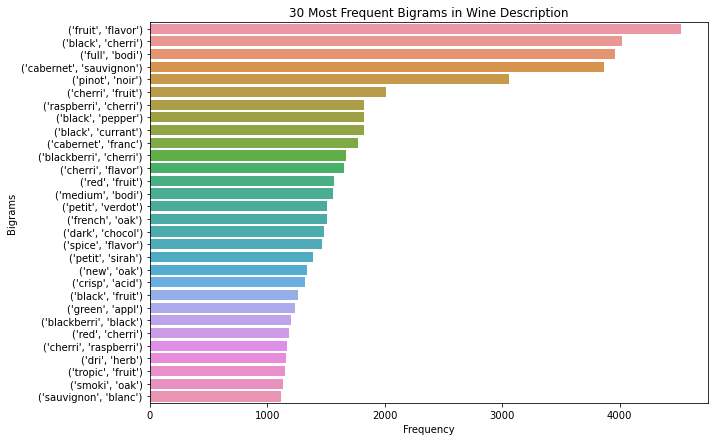

In [133]:
plt.figure(figsize = (10,7))
sns.barplot(data = bigrams_freq_DF, x = "Count", y = "Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("30 Most Frequent Bigrams in Wine Description")
plt.show()

# TRI-GRAMS

In [134]:
df["Trigrams"] = df["description_Lemm"].apply(lambda x: list(ngrams(x, 3)))

In [137]:
df

,description,price,variety,winery,location,rating,description_Token,description_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams
0,tremend variet wine hail oakvil age three year...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",1,"[tremend, variet, wine, hail, oakvil, age, thr...","[tremend, variet, wine, hail, oakvil, age, thr...",0.272222,0.8834,"[(tremend, variet), (variet, wine), (wine, hai...","[(tremend, variet, wine), (variet, wine, hail)..."
2,mac watson honor memori wine made mother treme...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",1,"[mac, watson, honor, memori, wine, made, mothe...","[mac, watson, honor, memori, wine, make, mothe...",-0.150000,0.7351,"[(mac, watson), (watson, honor), (honor, memor...","[(mac, watson, honor), (watson, honor, memori)..."
3,spent month new french oak incorpor fruit ponz...,65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",1,"[spent, month, new, french, oak, incorpor, fru...","[spent, month, new, french, oak, incorpor, fru...",0.001623,0.2023,"[(spent, month), (month, new), (new, french), ...","[(spent, month, new), (month, new, french), (n..."
8,name vineyard formerli bottl delancellotti fin...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",1,"[name, vineyard, formerli, bottl, delancellott...","[name, vineyard, formerli, bottl, delancellott...",0.116667,0.4019,"[(name, vineyard), (vineyard, formerli), (form...","[(name, vineyard, formerli), (vineyard, former..."
9,produc sourc two block vineyard wine one high ...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",1,"[produc, sourc, two, block, vineyard, wine, on...","[produc, sourc, two, block, vineyard, wine, on...",0.240000,0.0000,"[(produc, sourc), (sourc, two), (two, block), ...","[(produc, sourc, two), (sourc, two, block), (t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
129919,ripe rich almost decad thick wine close washin...,105.0,Red Blend,Nicholas Cole Cellars,"US,Walla Walla Valley (WA),Washington",1,"[ripe, rich, almost, decad, thick, wine, close...","[ripe, rich, almost, decad, thick, wine, close...",-0.001407,0.6908,"[(ripe, rich), (rich, almost), (almost, decad)...","[(ripe, rich, almost), (rich, almost, decad), ..."
129926,pure syrah rein estat vineyard focu also tight...,41.0,Syrah,Reininger,"US,Walla Walla Valley (WA),Washington",1,"[pure, syrah, rein, estat, vineyard, focu, als...","[pure, syrah, rein, estat, vineyard, focu, als...",0.083929,0.6908,"[(pure, syrah), (syrah, rein), (rein, estat), ...","[(pure, syrah, rein), (syrah, rein, estat), (r..."
129945,hail one popular vineyard variet whole central...,20.0,Chenin Blanc,Birichino,"US,Santa Ynez Valley,California",1,"[hail, one, popular, vineyard, variet, whole, ...","[hail, one, popular, vineyard, variet, whole, ...",0.140000,-0.2500,"[(hail, one), (one, popular), (popular, vineya...","[(hail, one, popular), (one, popular, vineyard..."
129949,bone use oak wine spent nine month enjoy cradl...,35.0,Chardonnay,Flora Springs,"US,Napa Valley,California",1,"[bone, use, oak, wine, spent, nine, month, enj...","[bone, use, oak, wine, spend, nine, month, enj...",0.187500,0.8020,"[(bone, use), (use, oak), (oak, wine), (wine, ...","[(bone, use, oak), (use, oak, wine), (oak, win..."


In [138]:
trigrams_list = list(itertools.chain.from_iterable(df["Trigrams"]))
trigrams_freq = collections.Counter(trigrams_list)

trigrams_freq_DF = pd.DataFrame(trigrams_freq.most_common(40), columns=['Trigrams', 'Count'])
trigrams_freq_DF

,Trigrams,Count
0,"(new, french, oak)",910
1,"(blend, cabernet, sauvignon)",880
2,"(cabernet, sauvignon, merlot)",761
3,"(blackberri, black, currant)",641
4,"(black, cherri, fruit)",551
5,"(merlot, cabernet, franc)",467
6,"(full, bodi, wine)",465
7,"(blackberri, black, cherri)",443
8,"(cherri, red, currant)",402
9,"(merlot, cabernet, sauvignon)",383


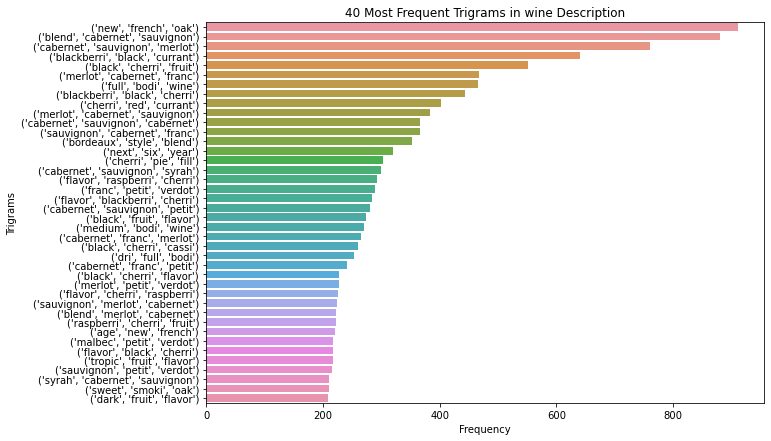

In [139]:
plt.figure(figsize = (10,7))
sns.barplot(data = trigrams_freq_DF, x = "Count", y = "Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("40 Most Frequent Trigrams in wine Description")
plt.show()

In [140]:
df[df['variety'].isnull()]


,description,price,variety,winery,location,rating,description_Token,description_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams


In [141]:
df = df.copy()
df['description'] = df['description'].apply(str)

In [142]:
df["Descriptionlenght"] = df['description'].apply(lambda w : len(re.findall(r'\w+', w)))
df.sample(50)

,description,price,variety,winery,location,rating,description_Token,description_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams,Descriptionlenght
48476,vineyard magic site one greatest oregon pinot ...,75.0,Pinot Noir,Adelsheim,"US,Dundee Hills,Oregon",1,"[vineyard, magic, site, one, greatest, oregon,...","[vineyard, magic, site, one, great, oregon, pi...",0.466667,0.9022,"[(vineyard, magic), (magic, site), (site, one)...","[(vineyard, magic, site), (magic, site, one), ...",29
39275,bright aliv crisp pear fresh citru love spici ...,35.0,Chardonnay,Black Stallion,"US,Los Carneros,California",1,"[bright, aliv, crisp, pear, fresh, citru, love...","[bright, aliv, crisp, pear, fresh, citru, love...",0.437500,0.8555,"[(bright, aliv), (aliv, crisp), (crisp, pear),...","[(bright, aliv, crisp), (aliv, crisp, pear), (...",20
111777,young visibl spritzi appeal wine burst forth s...,24.0,Riesling,Chehalem,"US,Ribbon Ridge,Oregon",1,"[young, visibl, spritzi, appeal, wine, burst, ...","[young, visibl, spritzi, appeal, wine, burst, ...",0.096591,0.4588,"[(young, visibl), (visibl, spritzi), (spritzi,...","[(young, visibl, spritzi), (visibl, spritzi, a...",31
96337,blackberri blueberri juic aroma lift vanilla a...,30.0,Syrah,Niner,"US,Paso Robles,California",1,"[blackberri, blueberri, juic, aroma, lift, van...","[blackberri, blueberri, juic, aroma, lift, van...",0.177778,0.5106,"[(blackberri, blueberri), (blueberri, juic), (...","[(blackberri, blueberri, juic), (blueberri, ju...",21
18226,sturdi red blend four bordeaux grape tannic ea...,15.0,Bordeaux-style Red Blend,Two Mountain,"US,Washington,Washington",2,"[sturdi, red, blend, four, bordeaux, grape, ta...","[sturdi, red, blend, four, bordeaux, grape, ta...",0.000000,0.0000,"[(sturdi, red), (red, blend), (blend, four), (...","[(sturdi, red, blend), (red, blend, four), (bl...",20
16887,expect smaller appel california given word lab...,24.0,Zinfandel,Orfila,"US,California,California",2,"[expect, smaller, appel, california, given, wo...","[expect, small, appel, california, give, word,...",0.175000,0.4588,"[(expect, small), (small, appel), (appel, cali...","[(expect, small, appel), (small, appel, califo...",8
66772,dri full bodi light smoki aroma modest unusu f...,16.0,White Blend,The Winery SF,"US,North Coast,California",2,"[dri, full, bodi, light, smoki, aroma, modest,...","[dri, full, bodi, light, smoki, aroma, modest,...",0.162500,0.3612,"[(dri, full), (full, bodi), (bodi, light), (li...","[(dri, full, bodi), (full, bodi, light), (bodi...",13
30834,bright tropic nose inten ripe dri cabernet fra...,16.0,Rosé,Lamoreaux Landing,"US,Finger Lakes,New York",2,"[bright, tropic, nose, inten, ripe, dri, caber...","[bright, tropic, nose, inten, ripe, dri, caber...",0.537500,0.7796,"[(bright, tropic), (tropic, nose), (nose, inte...","[(bright, tropic, nose), (tropic, nose, inten)...",20
95419,made leaner acid miner style bone dri wine fee...,39.0,Chardonnay,Testarossa,"US,Sta. Rita Hills,California",1,"[made, leaner, acid, miner, style, bone, dri, ...","[make, leaner, acid, miner, style, bone, dri, ...",0.388889,0.7783,"[(make, leaner), (leaner, acid), (acid, miner)...","[(make, leaner, acid), (leaner, acid, miner), ...",29
108063,rich full bodi dri syrah show fine terroir com...,29.0,Syrah,Coastview,"US,Monterey County,California",1,"[rich, full, bodi, dri, syrah, show, fine, ter...","[rich, full, bodi, dri, syrah, show, fine, ter...",0.243750,0.6597,"[(rich, full), (full, bodi), (bodi, dri), (dri...","[(rich, full, bodi), (full, bodi, dri), (bodi,...",29


In [143]:
df["Descriptionlenght"].describe()

count    61628.000000
mean        25.956886
std          7.558014
min          3.000000
25%         21.000000
50%         26.000000
75%         31.000000
max         70.000000
Name: Descriptionlenght, dtype: float64

In [144]:
df["Descriptionlenght"].sum()

1599671

In [145]:
df['description'].describe()

count                                                 61628
unique                                                39859
top       dusti cigar smoke charact nose blend syrah cab...
freq                                                      6
Name: description, dtype: object

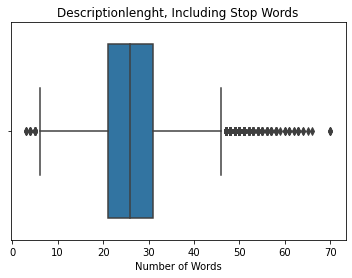

In [146]:
#plt.figure()
sns.boxplot(data = df, x = "Descriptionlenght")
plt.xlabel('Number of Words')
plt.title('Descriptionlenght, Including Stop Words')
plt.show()

C:\Users\santu\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


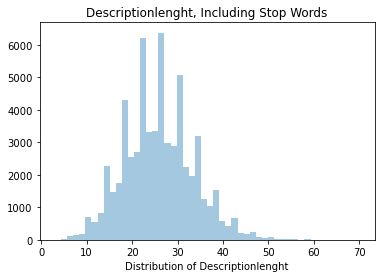

In [147]:
sns.distplot(df["Descriptionlenght"], kde = False)
plt.xlabel('Distribution of Descriptionlenght')
plt.title('Descriptionlenght, Including Stop Words')
plt.show()

In [148]:
df2 = df['variety'].value_counts()[:50].to_frame().reset_index()
top50 = df2['index'].to_numpy()
top50

array(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Syrah', 'Zinfandel', 'Bordeaux-style Red Blend', 'Merlot',
       'Sauvignon Blanc', 'Riesling', 'Rhône-style Red Blend',
       'Sparkling Blend', 'Rosé', 'White Blend', 'Petite Sirah',
       'Cabernet Franc', 'Viognier', 'Pinot Gris', 'Grenache',
       'Sangiovese', 'Malbec', 'Rhône-style White Blend',
       'Gewürztraminer', 'Tempranillo', 'Barbera', 'Meritage',
       'Mourvèdre', 'Pinot Grigio', 'Petit Verdot', 'G-S-M',
       'Chenin Blanc', 'Pinot Blanc', 'Cabernet Blend', 'Roussanne',
       'Port', 'Sémillon', 'Cabernet Sauvignon-Syrah', 'Primitivo',
       'Albariño', 'Grenache Blanc', 'Moscato', 'Grüner Veltliner',
       'Champagne Blend', 'Bordeaux-style White Blend',
       'Sauvignon Blanc-Semillon', 'Fumé Blanc',
       'Semillon-Sauvignon Blanc', 'Carmenère', 'Marsanne', 'Muscat'],
      dtype=object)

In [149]:
df = df[df['variety'].isin(top50)]
df.shape

(60146, 13)

In [150]:
df.head()

,description,price,variety,winery,location,rating,description_Token,description_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams,Descriptionlenght
0,tremend variet wine hail oakvil age three year...,235.0,Cabernet Sauvignon,Heitz,"US,Napa Valley,California",1,"[tremend, variet, wine, hail, oakvil, age, thr...","[tremend, variet, wine, hail, oakvil, age, thr...",0.272222,0.8834,"[(tremend, variet), (variet, wine), (wine, hai...","[(tremend, variet, wine), (variet, wine, hail)...",35
2,mac watson honor memori wine made mother treme...,90.0,Sauvignon Blanc,Macauley,"US,Knights Valley,California",1,"[mac, watson, honor, memori, wine, made, mothe...","[mac, watson, honor, memori, wine, make, mothe...",-0.150000,0.7351,"[(mac, watson), (watson, honor), (honor, memor...","[(mac, watson, honor), (watson, honor, memori)...",30
3,spent month new french oak incorpor fruit ponz...,65.0,Pinot Noir,Ponzi,"US,Willamette Valley,Oregon",1,"[spent, month, new, french, oak, incorpor, fru...","[spent, month, new, french, oak, incorpor, fru...",0.001623,0.2023,"[(spent, month), (month, new), (new, french), ...","[(spent, month, new), (month, new, french), (n...",40
8,name vineyard formerli bottl delancellotti fin...,65.0,Pinot Noir,Bergström,"US,Chehalem Mountains,Oregon",1,"[name, vineyard, formerli, bottl, delancellott...","[name, vineyard, formerli, bottl, delancellott...",0.116667,0.4019,"[(name, vineyard), (vineyard, formerli), (form...","[(name, vineyard, formerli), (vineyard, former...",26
9,produc sourc two block vineyard wine one high ...,60.0,Pinot Noir,Blue Farm,"US,Sonoma Coast,California",1,"[produc, sourc, two, block, vineyard, wine, on...","[produc, sourc, two, block, vineyard, wine, on...",0.240000,0.0000,"[(produc, sourc), (sourc, two), (two, block), ...","[(produc, sourc, two), (sourc, two, block), (t...",31


In [151]:
df.columns

Index(['description', 'price', 'variety', 'winery', 'location', 'rating',
       'description_Token', 'description_Lemm', 'Sentiment_TextBlob',
       'Sentiment_VADER', 'Bigrams', 'Trigrams', 'Descriptionlenght'],
      dtype='object')

In [152]:
cleanedData= df.drop(['description_Token', 'description_Lemm', 'Sentiment_TextBlob',
       'Sentiment_VADER', 'Bigrams', 'Trigrams', 'Descriptionlenght'],axis = 1)

In [153]:
cleanedData.columns

Index(['description', 'price', 'variety', 'winery', 'location', 'rating'], dtype='object')